# Linear Regression

## Simple linear regression

### Dataset description and visualisation

<b>Student Hours & Scores: </b> In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

<div class="alert alert-block alert-danger"> 

1. Import the student hours and scores dataset.
2. Is this task a multiple or a simple linear regression problem?
3. Which variable represents the dependent variable, and which one represents the independent variable?
4. Display the number of samples and features in the dataset.
5. Display the information about the dataset features.
6. Describe the features by displaying their statistics.
7. Plot the data and observe whether it demonstrates linear separability.
<div/>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\projects\tp2ML\tp3\student_scores.csv')

In [7]:
print(*df.columns, sep=', ')

Hours, Scores


__Since we only have one feature, this is a single linear regression problem__
__The independent variable is "Hours", and the dependent variable is "Scores"__

In [8]:
samples, features = df.shape
print(f"Number of samples: {samples}")
print(f"Number of features: {features}")

Number of samples: 25
Number of features: 2


In [9]:
print('Info about the dataset\'s features: ')
print(df.info())

Info about the dataset's features: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes
None


In [10]:
print('Statistics on the dataset\'s features: ')
print(df.describe())

Statistics on the dataset's features: 
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


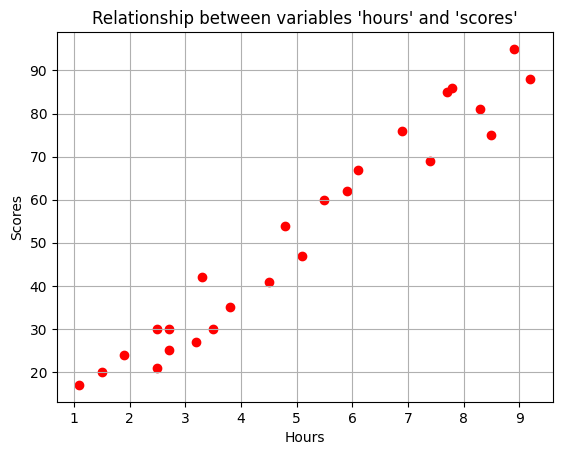

In [11]:
plt.scatter(df['Hours'], df['Scores'], c='red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title("Relationship between variables 'hours' and 'scores'")
plt.grid(True)
plt.show()

In [12]:
print(df['Hours'].corr(df['Scores']))

0.9761906560220887


A high correlation implies a strong linear relationship between the variables 'Hours' and 'Scores'

### Dataset training and evaluation

<div class="alert alert-block alert-danger">  
    
1. Split the dataset into training and testing sets.
2. Train the data using the LinearRegression module from sklearn. 
3. Display the model's equation.
4. Create a plot showing the data and the generated model.
5. Display the performance of the generated model on the training and the test set, based on the following metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared. Does the generated model present an overfitting problem?
6. Describe the R-squared metric and its advantages compared to the other metrics.
7. Is the generated model characterized by good performance?
8. Create a plot visualizing the difference between actual and predicted values.
<div/>

In [13]:
X = df['Hours']
y = df['Scores']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)
X_train = np.array(X_train).reshape(-1, 1)
print(X_train)
print(X_test)

X_test = np.array(X_test).reshape(-1, 1)

y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

[[1.5]
 [3.2]
 [4.5]
 [8.9]
 [8.5]
 [3.5]
 [2.7]
 [1.9]
 [4.8]
 [6.1]
 [7.8]
 [5.5]
 [7.7]
 [1.1]
 [7.4]
 [9.2]]
8     8.3
16    2.5
0     2.5
23    6.9
11    5.9
9     2.7
13    3.3
1     5.1
22    3.8
Name: Hours, dtype: float64


In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [ ]:
def r2_score(y_test, y_pred):
    return 1 - np.sum((y_test - y_pred)**2)/(np.sum((y_test - np.mean(y_test))**2))

#should be 9rib l 01

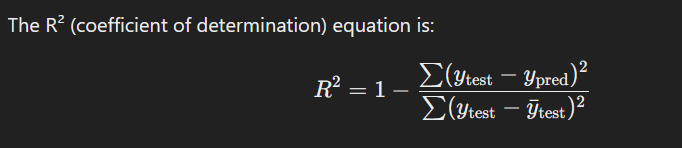

In [19]:
def mean_absolute_error(y_test, y_pred):
    return np.mean(np.abs(y_test - y_pred))

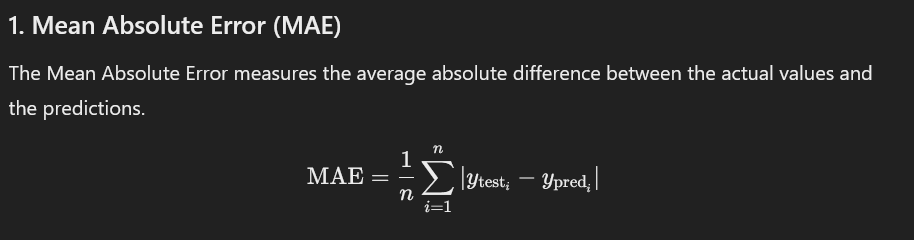

In [20]:
def mean_squared_error(y_test, y_pred):
    return np.mean((y_test - y_pred) ** 2)

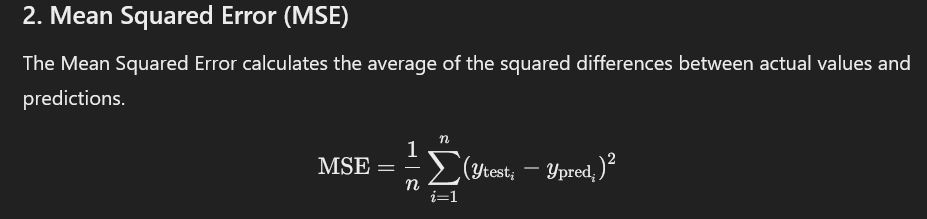

In [21]:
def root_mean_squared_error(y_test, y_pred):
    return np.sqrt(np.mean((y_test - y_pred)**2))

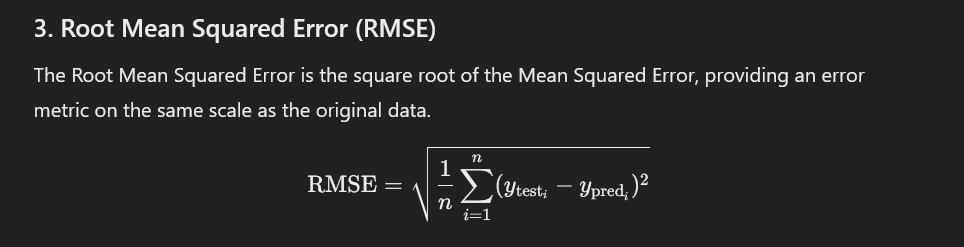

In [22]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [33]:
print(f"Mean Absolute Error (MAE): {mae} - This is the average absolute difference between predicted and actual values, representing the model's average prediction error.")
print(f"Mean Squared Error (MSE): {mse} - This is the average of the squared differences between predicted and actual values, giving more weight to larger errors.")
print(f"Root Mean Squared Error (RMSE): {rmse} - This is the square root of the MSE, indicating the model's prediction error in the same units as the target variable.")
print(f"R-squared (R²): {r2} - This is the coefficient of determination, showing how well the model explains the variability in the data. Values closer to 1 indicate a better fit.")


Mean Absolute Error (MAE): 4.564015037730867 - This is the average absolute difference between predicted and actual values, representing the model's average prediction error.
Mean Squared Error (MSE): 24.074686364260987 - This is the average of the squared differences between predicted and actual values, giving more weight to larger errors.
Root Mean Squared Error (RMSE): 4.90659620962037 - This is the square root of the MSE, indicating the model's prediction error in the same units as the target variable.
R-squared (R²): 0.9435488190277577 - This is the coefficient of determination, showing how well the model explains the variability in the data. Values closer to 1 indicate a better fit.


In [34]:
a = model.coef_[0]
b = model.intercept_
print(a, b)

[9.65029083] [3.40503018]


In [37]:
x = np.linspace(0, 10)

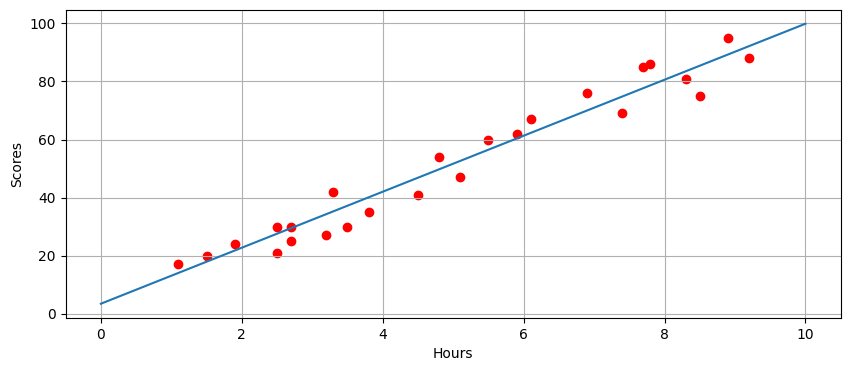

In [38]:
plt.figure(figsize=(10, 4))
plt.scatter(X, y, c='red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot(x, a*x + b)
plt.grid(True)
plt.show()